In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

import pytelligence as pt

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

sns.set_theme()

/home/george/Desktop/pytelligence/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(
    "./data/breast_cancer_cat/breast-cancer.data",
    names=[
        "class",
        "age",
        "menopause",
        "tumor-size",
        "inv-nodes",
        "node-caps",
        "deg-malig",
        "breast",
        "breast-quad",
        "irradiat",
    ],
)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
# pt.feat_analysis.get_distribution(df)

In [4]:
# sns.jointplot(data=df, x="deg-malig", y="breast", hue="class")

## Training

In [5]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [6]:
setup, X_sample, y_sample = pt.modelling.prepare_data(
    train_data=df,
    config_path="./config_bc_cat.yml",
)

[I 2022-10-01 13:46:57] %%% PREPARING DATA
[I 2022-10-01 13:46:57] Read ./config_bc_cat.yml: 
 {'modelling': {'target_clf': 'class', 'numeric_cols': ['deg-malig'], 'categorical_cols': ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], 'feature_scaling': False}}
[I 2022-10-01 13:46:57] Created preprocessing pipeline with following steps: ['ohe']
[I 2022-10-01 13:46:57] Applied preprocessing transformations
[I 2022-10-01 13:46:57] Encoded target variable using classes: [(0, 'no-recurrence-events'), (1, 'recurrence-events')]


In [7]:
X_sample

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_?,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
2,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [8]:
compare_df, algo_list, model_list = pt.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        # "dt",
        # "rf",
        # "ridge",
        # "perceptron",
        # "passive-aggressive",
        # "extratree",
        # "extratrees",
        # "knn",
        "nb",
        # "linearsvc",
        # "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

[I 2022-10-01 13:46:58] %%% COMPARING ALGORITHMS
[W 2022-10-01 13:46:58] The algorithms ['lr'] work suboptimally without scaled features. Consider turning it on within the config and rerun pt.modelling.prepare_data().
[I 2022-10-01 13:46:58] Evaluating lr...
[I 2022-10-01 13:47:13] Evaluating nb...


,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s)
0,nb,0.549,0.447,0.835,0.552,0.659,0.036
1,lr,0.678,0.527,0.329,0.338,0.653,0.139


In [9]:
le = setup.y_clf_encoder
preds = model_list[-1].predict(X_sample)
le.inverse_transform(preds)

array(['recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events'], dtype=object)

In [10]:
print(*[(i, class_) for i, class_ in enumerate(le.classes_)])

(0, 'no-recurrence-events') (1, 'recurrence-events')


In [12]:
compare_df_tune, model_list, opt_history_dict = (
        pt.modelling.tune_hyperparams(
               setup=setup,
               include=["lr", "nb"],
               optimize="f1",
               n_trials=50,
               return_models=True,
        )
)
compare_df_tune

[I 2022-10-01 13:47:47] %%% TUNING HYPERPARAMETERS
[W 2022-10-01 13:47:47] The algorithms ['lr'] work suboptimally without scaled features. Consider turning it on within the config and rerun pt.modelling.prepare_data().
[I 2022-10-01 13:47:47] Algorithms: ['lr', 'nb']
[I 2022-10-01 13:47:47] Metric: f1
[I 2022-10-01 13:47:47] Trials per algorithm: 50
[I 2022-10-01 13:47:48] Trial 0 finished with value: 0.0000 and parameters: {'C': 0.00923877642726791, 'l1_ratio': 0.37240464230196757}. Best is trial 0 with value: 0.0000
[I 2022-10-01 13:47:48] Trial 1 finished with value: 0.0000 and parameters: {'C': 0.00017099827427615987, 'l1_ratio': 0.11420957923715036}. Best is trial 0 with value: 0.0000
[I 2022-10-01 13:47:49] Trial 2 finished with value: 0.0000 and parameters: {'C': 1.1759082244728964e-05, 'l1_ratio': 0.12367387822415088}. Best is trial 0 with value: 0.0000
[I 2022-10-01 13:47:49] Trial 3 finished with value: 0.0000 and parameters: {'C': 0.0002733855817031065, 'l1_ratio': 0.037558

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s),hyperparams
0,nb,0.619,0.493,0.788,0.578,0.656,0.028,"{'priors': None, 'var_smoothing': 7.2330101728..."
1,lr,0.671,0.579,0.376,0.398,0.609,0.470,"{'C': 6.254082270609554, 'class_weight': None,..."


In [13]:
opt_history_dict["nb"].show()

[I 2022-10-01 13:49:45] %%% REDUCING FEATURE SPACE
[I 2022-10-01 13:49:45] Algorithm selected for feature space reduction: nb
[I 2022-10-01 13:49:45] Metric to optimize for: f1
[I 2022-10-01 13:49:45] Acceptable loss ratio: 0.99
[I 2022-10-01 13:49:45] Reference metric: 0.578
[I 2022-10-01 13:49:45] Minimum acceptable metric: 0.99 * 0.578 = 0.572
[I 2022-10-01 13:49:58] Feature count: 40, metric: 0.586 (new best), removing worst feature: breast-quad_right_up
[I 2022-10-01 13:50:10] Feature count: 39, metric: 0.593 (new best), removing worst feature: breast_left
[I 2022-10-01 13:50:20] Feature count: 38, metric: 0.596 (new best), removing worst feature: tumor-size_20-24
[I 2022-10-01 13:50:31] Feature count: 37, metric: 0.596, removing worst feature: age_40-49
[I 2022-10-01 13:50:42] Feature count: 36, metric: 0.600 (new best), removing worst feature: breast-quad_right_low
[I 2022-10-01 13:50:52] Feature count: 35, metric: 0.598, removing worst feature: tumor-size_25-29
[I 2022-10-01 13

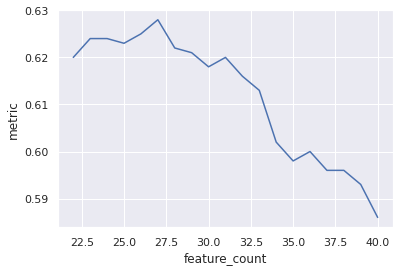

In [15]:
best_feature_list, metric_feature_df = pt.modelling.reduce_feature_space(
    setup=setup,
    algorithm= "nb",
    metric="f1",
    reference_metric=compare_df_tune.iloc[0]["f1"],
    acceptable_loss=0.99,
    hyperparams=compare_df_tune.iloc[0]["hyperparams"]
)

In [17]:
compare_df_final, model_list, opt_history_dict = (
        pt.modelling.tune_hyperparams(
               setup=setup,
               include=["nb", "lr"],
               optimize="f1",
               n_trials=20,
               feature_list=best_feature_list,
               return_models=True,
        )
)
compare_df_final

[I 2022-10-01 13:53:12] %%% TUNING HYPERPARAMETERS
[W 2022-10-01 13:53:12] The algorithms ['lr'] work suboptimally without scaled features. Consider turning it on within the config and rerun pt.modelling.prepare_data().
[I 2022-10-01 13:53:12] Algorithms: ['nb', 'lr']
[I 2022-10-01 13:53:12] Metric: f1
[I 2022-10-01 13:53:12] Trials per algorithm: 20
[I 2022-10-01 13:53:12] Trial 0 finished with value: 0.4659 and parameters: {'var_smoothing': 0.007449921926812464}. Best is trial 0 with value: 0.4659
[I 2022-10-01 13:53:13] Trial 1 finished with value: 0.5862 and parameters: {'var_smoothing': 1.1487518810930647e-06}. Best is trial 1 with value: 0.5862
[I 2022-10-01 13:53:13] Trial 2 finished with value: 0.5635 and parameters: {'var_smoothing': 3.5069463088014894e-05}. Best is trial 1 with value: 0.5862
[I 2022-10-01 13:53:14] Trial 3 finished with value: 0.6267 and parameters: {'var_smoothing': 6.852840209009875e-06}. Best is trial 3 with value: 0.6267
[I 2022-10-01 13:53:14] Trial 4 fi

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s),hyperparams
0,nb,0.655,0.570,0.800,0.627,0.678,0.061,"{'priors': None, 'var_smoothing': 6.8528402090..."
1,lr,0.699,0.572,0.341,0.353,0.686,0.161,"{'C': 0.631715930371897, 'class_weight': None,..."


In [15]:
setup.prep_pipe

Pipeline(steps=[('ohe', OHE())])

In [16]:
pt.modelling.export_model(
        setup=setup,
        model=model_list[0],
        target_dir="./",
    )

[I 2022-10-01 12:49:51] Exported modelling pipeline to 'model_2022-10-01_nb_#1.joblib'
